[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/165Wc0a5qrMT6wWjRdfzm6t4OX-5NBVBy#scrollTo=ymQBerUTl3BW)

**Modelo de regresión usando statsmodels**

 En el caso de modelos estadisticos el estandar y la herramienta mas comun ha sido statsmodels. esta libreria incorpora infinidad de herramientas de modelación como: modelos probabilisticos, analisis de series de tiempo e infinidad de pruebas estadisticas. Para ver mayor documentación: https://www.statsmodels.org/stable/user-guide.html

Para este ejemplo usaremos las ventas anuales de cafeterias en Canadá con el fin de predecir las ventas de cada una en función de sus características.

## **Configuración Inicial**

**Conexion Drive**

In [ ]:
# Si necesitas ejecutar el notebook con un archivo desde tu drive personal
# from google.colab import drive
# drive.mount('/gdrive')

# #Repositorios
# path = '/gdrive/MyDrive/BQ - Data Science/BQ - Repositorios/Repositorio_Portafolio/'
# filename = "VentasCaf.csv"
# fullpath = os.path.join(path, filename)

Mounted at /gdrive


### **Librerias**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Para los graficos tengan las mismas dimensiones
%matplotlib inline
plt.style.use('ggplot')
#plt.rcParams['figure.figsize'] = (7, 4)

pd.options.display.max_columns = None
sns.set_style('whitegrid')
color = sns.color_palette()

### **Rutas**

In [ ]:
fullpath = 'https://raw.githubusercontent.com/bryanOsmar07/personal-projects-portafolio/main/Data/VentasCaf.csv'

### **Parámetros**

In [ ]:
target = 'ventas'
columnsNumeric = ['area', 'publicidad_exterior','num_productos','ventas']
columnsString = ['delivery']

# **Lectura de datos**

In [ ]:
df = pd.read_csv(fullpath)

In [ ]:
print(df.shape)
df.head(3)

(1116, 6)


,Unnamed: 0,area,publicidad_exterior,num_productos,delivery,ventas
0,0,52.324250,0,28.717111,1,83188
1,1,53.972180,0,24.061171,1,68638
2,2,53.231438,0,16.724146,1,84210


# **Data Wrangling**

In [ ]:
df.columns

Index(['Unnamed: 0', 'area', 'publicidad_exterior', 'num_productos',
       'delivery', 'ventas'],
      dtype='object')

In [ ]:
# Validamos si los tipos de variables son los adecuados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1116 non-null   int64  
 1   area                 1116 non-null   float64
 2   publicidad_exterior  1116 non-null   int64  
 3   num_productos        1116 non-null   float64
 4   delivery             1116 non-null   int64  
 5   ventas               1116 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 52.4 KB


In [ ]:
# Eliminamos la primera columna
del df['Unnamed: 0']

In [ ]:
df.duplicated().any()

True

In [ ]:
df[df.duplicated()]

,area,publicidad_exterior,num_productos,delivery,ventas
250,52.324250,0,28.717111,1,83188
251,53.972180,0,24.061171,1,68638
252,53.231438,0,16.724146,1,84210
253,43.583231,0,29.307826,1,82888
254,36.769380,0,18.313163,0,57796
...,...,...,...,...,...
1111,57.897769,0,40.112189,1,74351
1112,51.929088,0,28.919572,1,72003
1113,47.682743,0,15.681251,1,61589
1114,53.701732,0,18.477609,1,74027


In [ ]:
# Validando registros únicos
print(df.shape)
print(df.nunique())

(1116, 5)
area                   250
publicidad_exterior      2
num_productos          248
delivery                 2
ventas                 249
dtype: int64


# **I. Analisis Exploratorio**

In [ ]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
area,1116.0,46.055877,6.428687,29.806932,41.650478,45.802647,50.268284,68.099009
publicidad_exterior,1116.0,0.212366,0.409166,0.000000,0.000000,0.000000,0.000000,1.000000
num_productos,1116.0,20.047960,6.978012,5.000000,15.603763,19.184180,24.061171,47.266020
delivery,1116.0,0.776882,0.416524,0.000000,1.000000,1.000000,1.000000,1.000000
ventas,1116.0,64003.767025,11473.470051,35143.000000,56872.000000,62856.000000,71023.250000,108296.000000


## **Revision Objetivo**


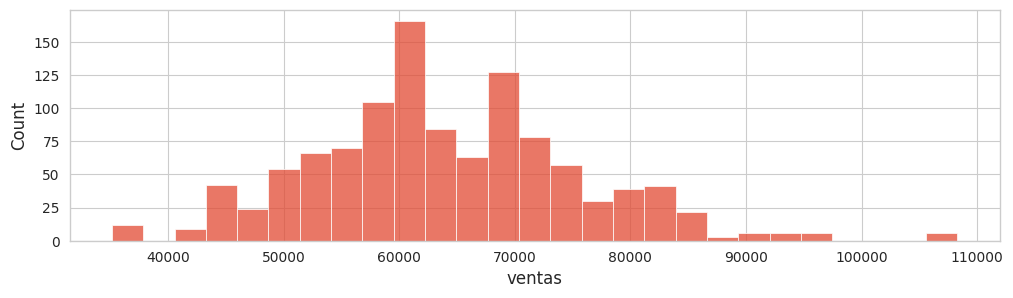

In [ ]:
plt.figure(figsize=(12,3))
sns.histplot(x=target, data=df);

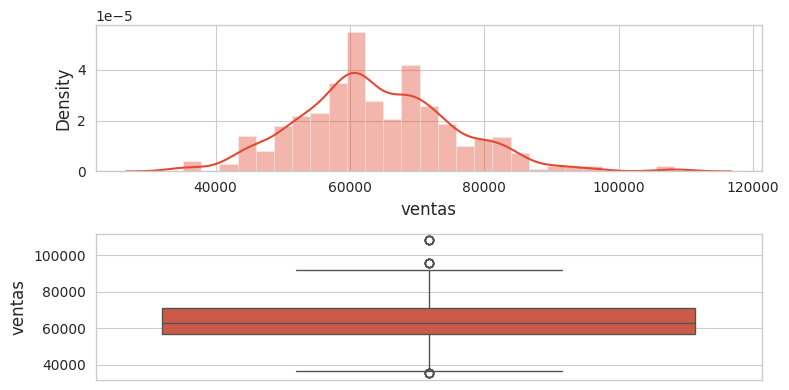

In [ ]:
fig = plt.figure(figsize=(8,4))
fig.add_subplot(2,1,1)
sns.distplot(df[target])
fig.add_subplot(2,1,2)
sns.boxplot(df[target])
plt.tight_layout()

## Analisis Univariado

### Categoricas

delivery
0    249
1    867
dtype: int64


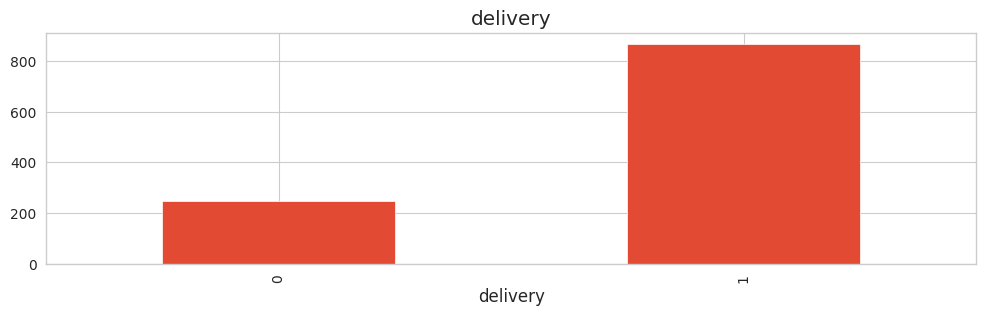

In [ ]:
for x in columnsString:
  plt.figure(figsize=(12,3))
  print(df.groupby(x).size())
  plt.title(x)
  df.fillna("--NULL").groupby(x)[x].count().plot(kind = "bar")
  plt.show()

### Numericas

In [ ]:
df[columnsNumeric].describe().T

,count,mean,std,min,25%,50%,75%,max
area,1116.0,46.055877,6.428687,29.806932,41.650478,45.802647,50.268284,68.099009
publicidad_exterior,1116.0,0.212366,0.409166,0.000000,0.000000,0.000000,0.000000,1.000000
num_productos,1116.0,20.047960,6.978012,5.000000,15.603763,19.184180,24.061171,47.266020
ventas,1116.0,64003.767025,11473.470051,35143.000000,56872.000000,62856.000000,71023.250000,108296.000000


In [ ]:
df.groupby(target).median() # Mediana no se ve afectada con valores atípicos

,area,publicidad_exterior,num_productos,delivery
ventas,,,,
35143,44.854125,0.0,14.131470,0.0
36365,36.644352,0.0,5.000000,0.0
37025,34.878380,0.0,12.564726,0.0
41891,37.502810,0.0,9.109240,1.0
42652,41.020862,0.0,17.697190,0.0
...,...,...,...,...
90479,52.555335,0.0,34.424441,1.0
90646,44.131499,1.0,33.083336,0.0
92158,55.190696,0.0,36.340208,0.0


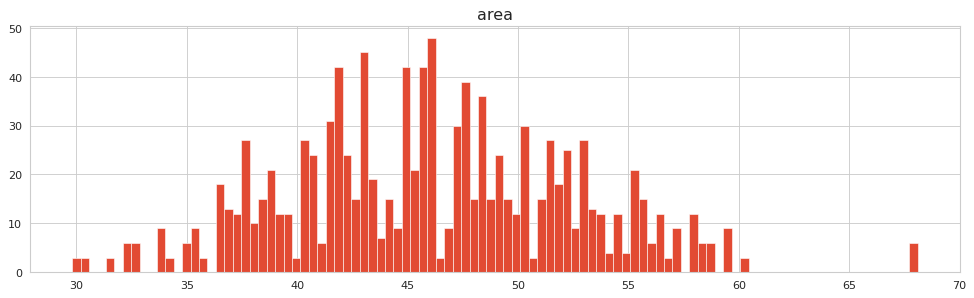

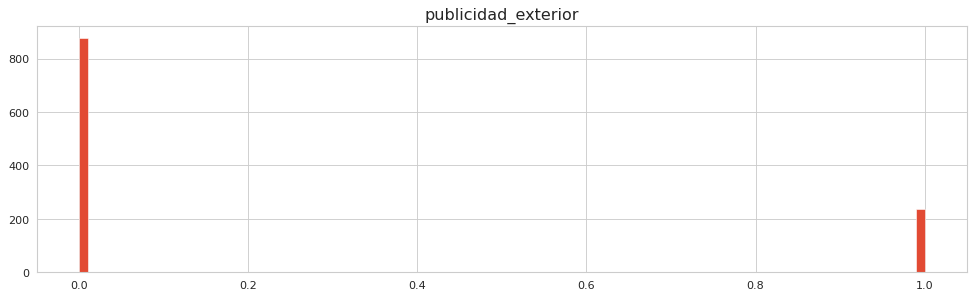

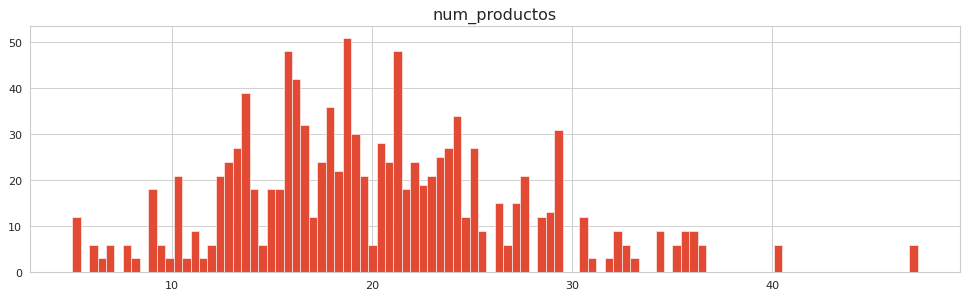

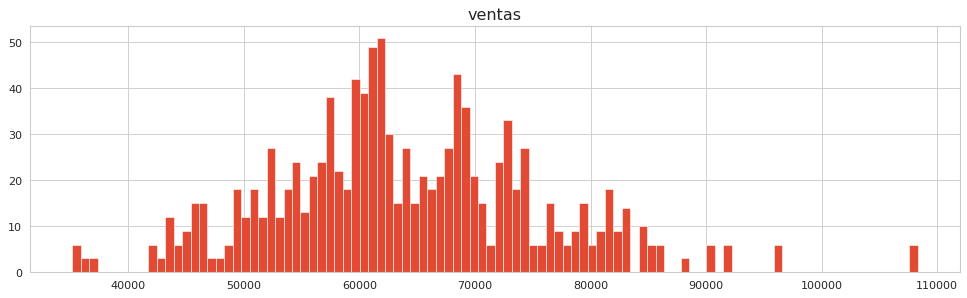

In [ ]:
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  plt.title(df[x].name)
  plt.hist(df[x],bins=100)
  plt.show()

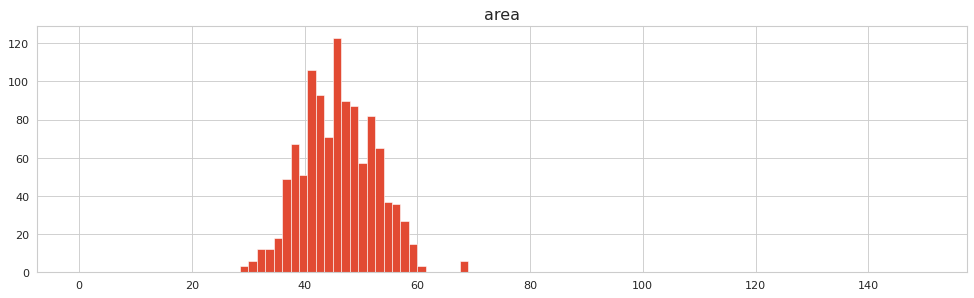

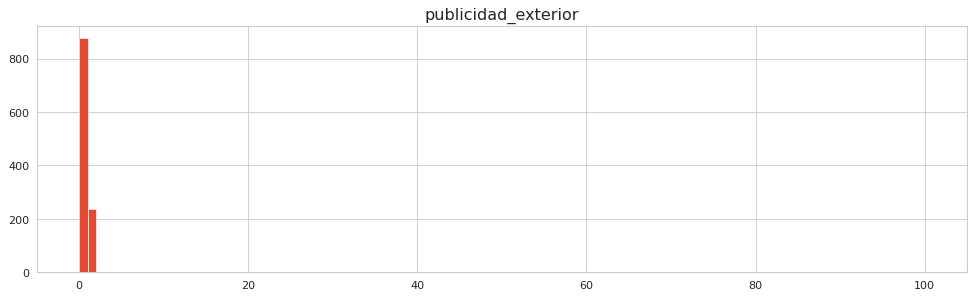

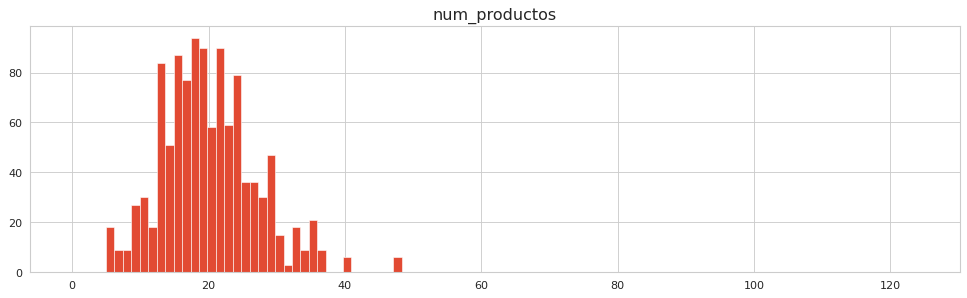

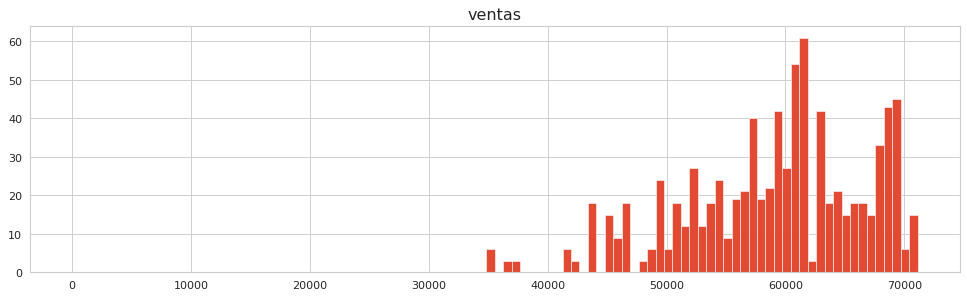

In [ ]:
# No consideramos las colas (outliers) para ver mejor la distribucion
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  Q03= int(df[x].quantile(0.75))+100
  plt.title(df[x].name)
  plt.hist(df[x],bins=100,range=(0,Q03))
  plt.show()

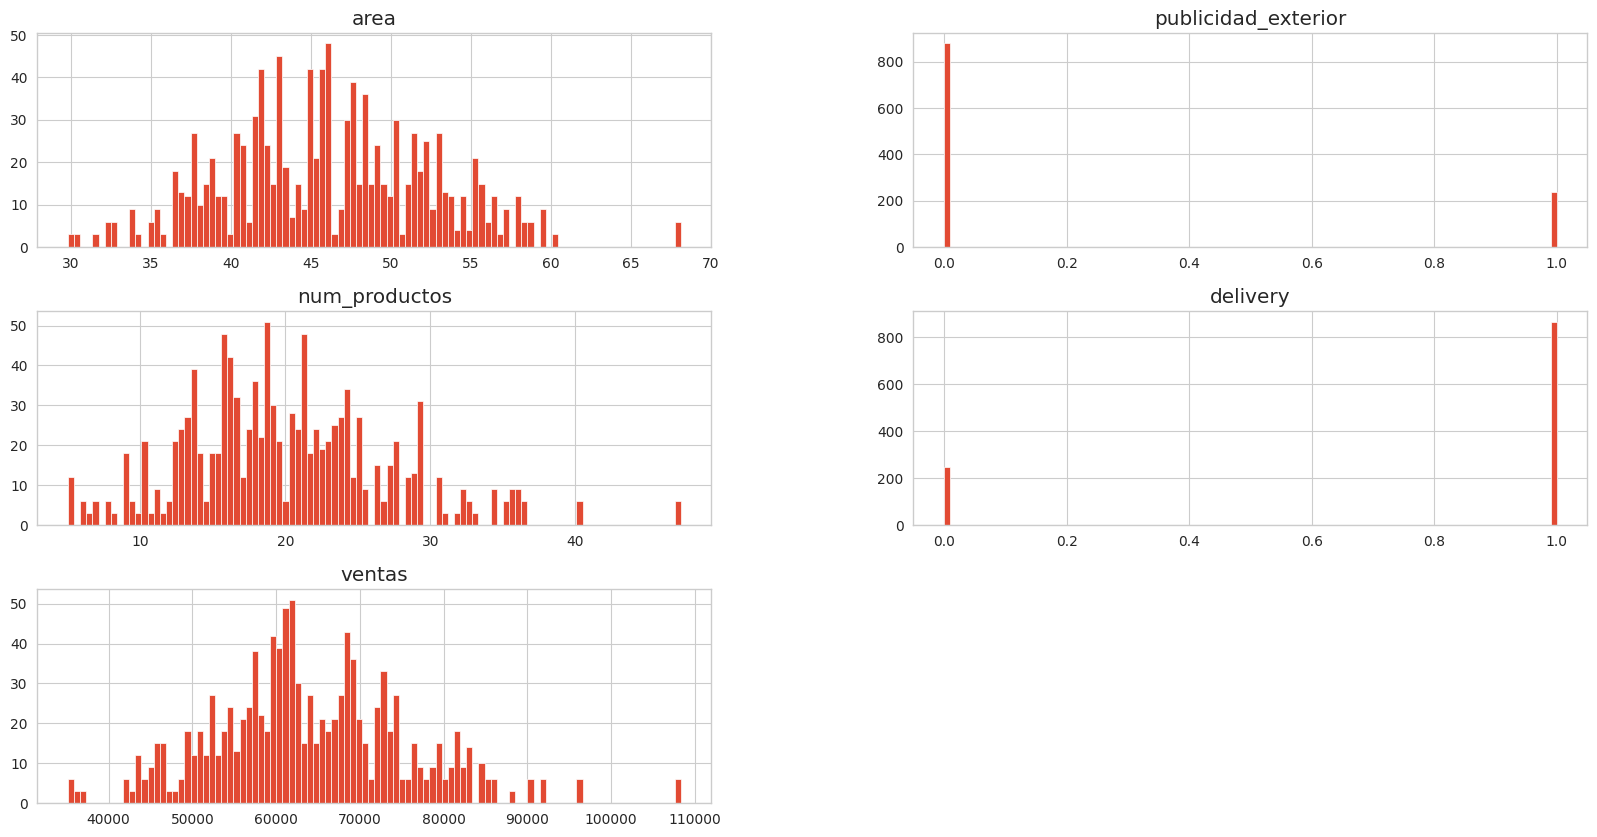

In [ ]:
df.hist(bins=100,figsize=(20,10));

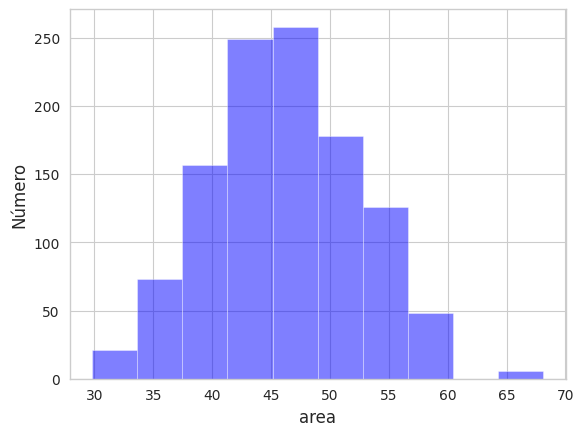

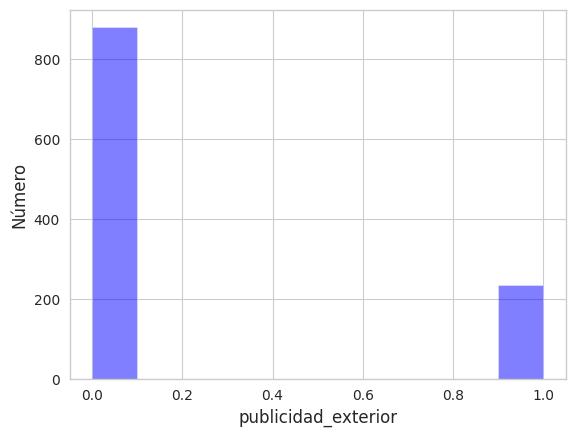

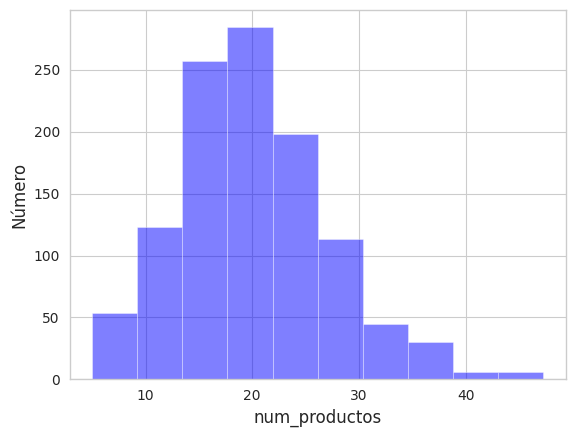

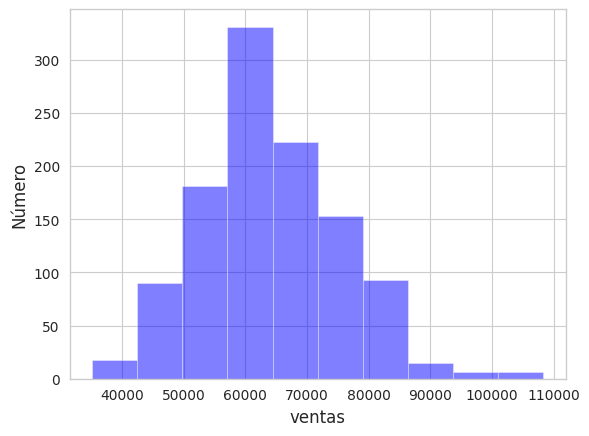

In [ ]:
num_bins = 10
data_0 = df

for i in columnsNumeric:
    n, bins, patches = plt.hist(data_0[i], num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(i)
    plt.ylabel('Número')
    plt.show()

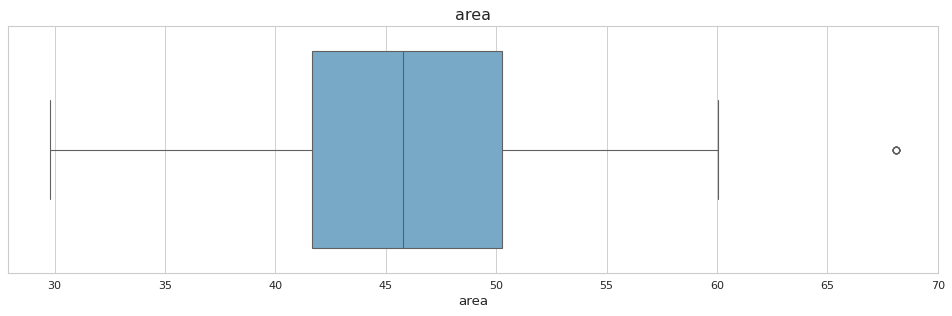

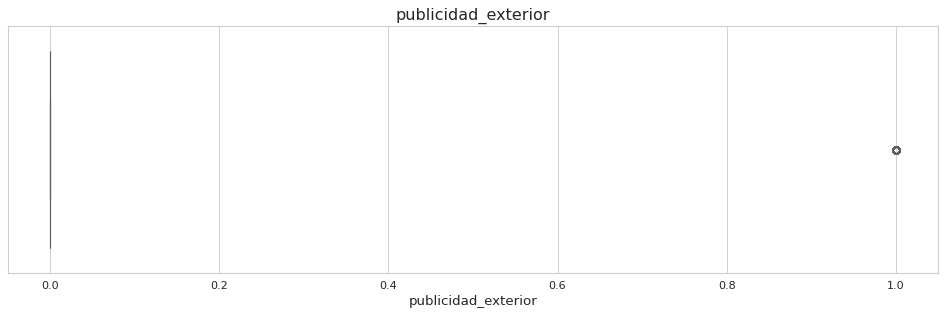

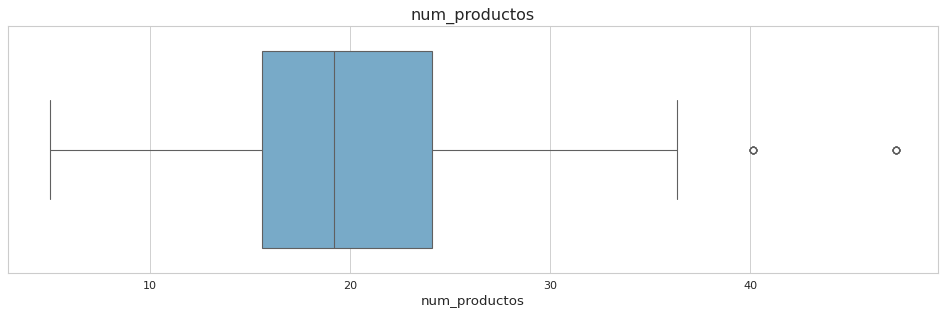

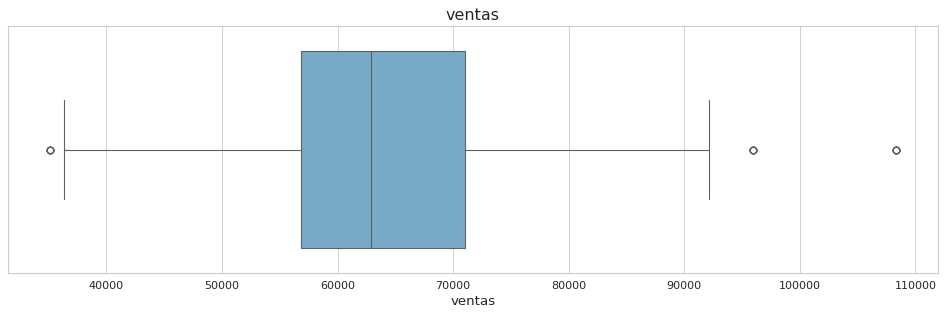

In [ ]:
# Grafico de Cajas para revision de atipicos
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  plt.title(df[x].name)
  sns.boxplot(x=df[x], palette="Blues")
  plt.show()

## Analisis Multivariado

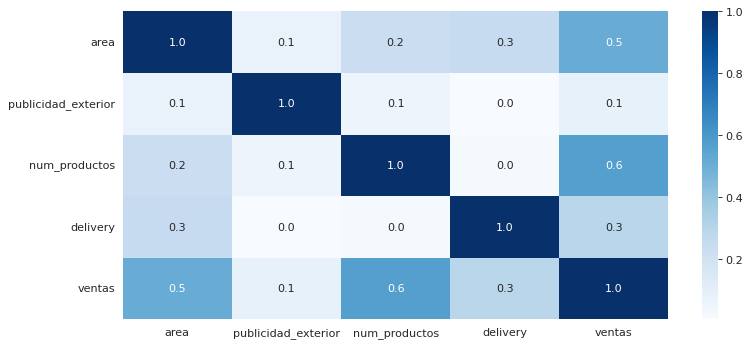

In [ ]:
# Analizamos la correlacion de las variables
# Spearman: Para variables numericas. No asume normalidad
plt.figure(figsize=(11,5), dpi=80)
sns.heatmap(abs(df.corr(method='spearman')),annot=True,fmt='.1f',cmap='Blues')
plt.show()

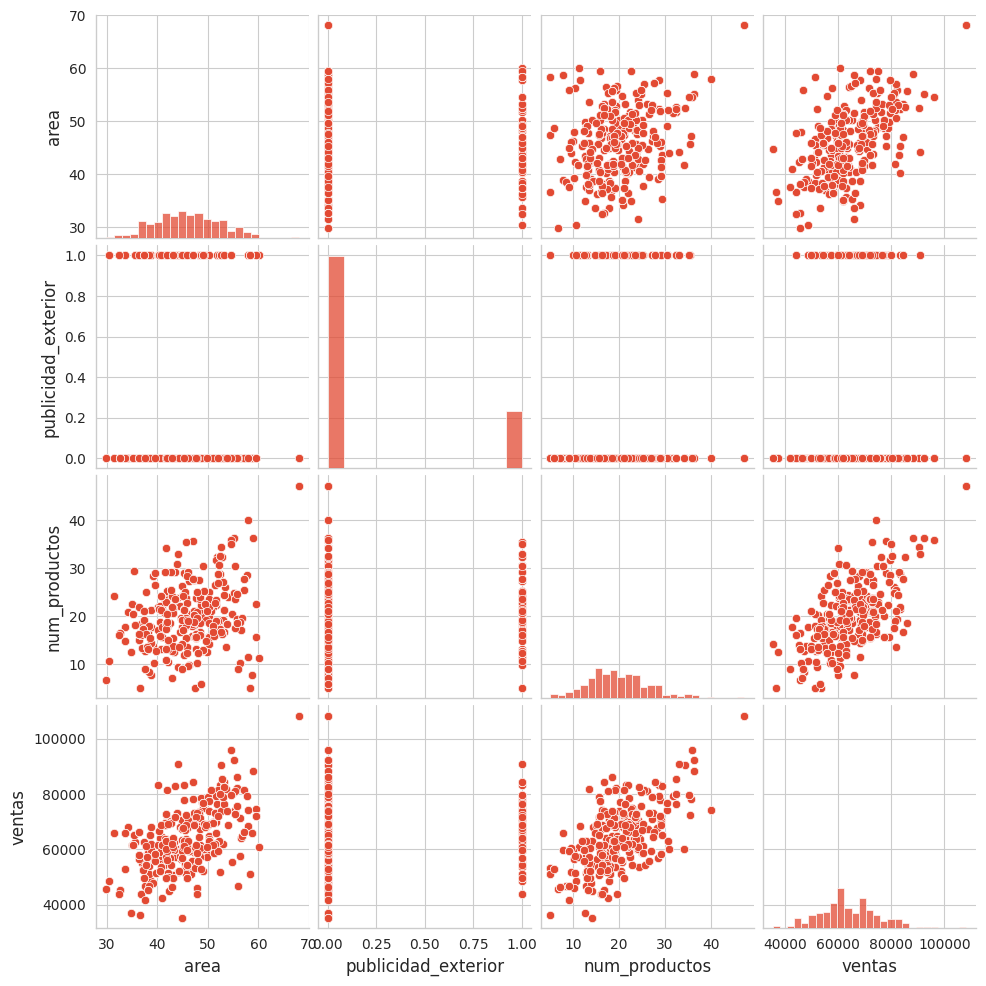

In [ ]:
sns.pairplot(df[columnsNumeric])

## Linealidad

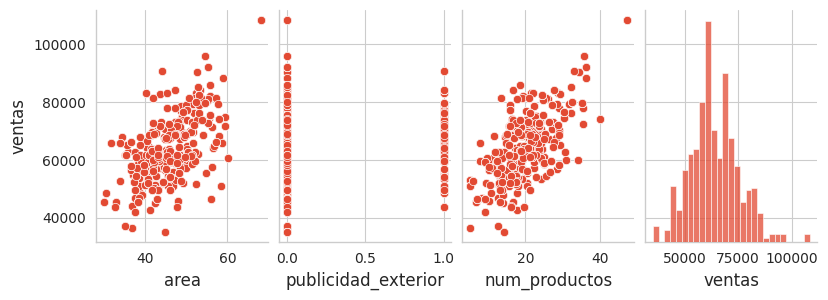

In [ ]:
# Linealidad
p = sns.pairplot(df, x_vars = columnsNumeric,
                 y_vars=target, size=3, aspect=0.7)

<Axes: >

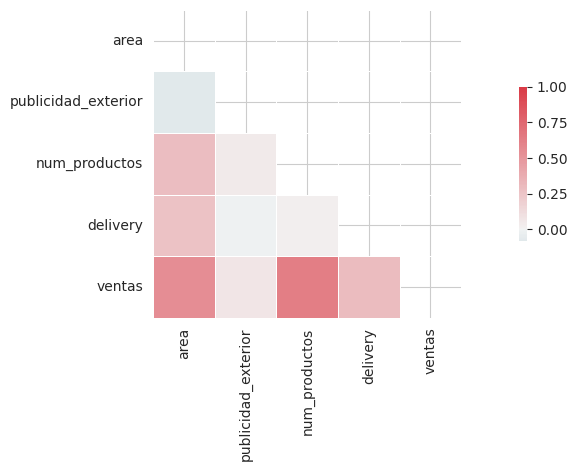

In [ ]:
# Multicolinealidad
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 4))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df[columnsNumeric].values, i) for i in range(df[columnsNumeric].shape[1])]
vif["features"] = df[columnsNumeric].columns
vif

,VIF Factor,features
0,43.995004,area
1,1.285279,publicidad_exterior
2,15.287230,num_productos
3,66.766913,ventas


## Asimetria

Calculamos el Coeficiente de Asimetría

In [ ]:
from scipy import stats

In [ ]:
data_ca = {'Variable' : columnsNumeric,
       'Coeficiente_Asim' : stats.skew(df[columnsNumeric])}
asim = pd.DataFrame(data_ca)
asim

,Variable,Coeficiente_Asim
0,area,0.174917
1,publicidad_exterior,1.406586
2,num_productos,0.593948
3,ventas,0.421702


## Tratamiento de Nulos

In [ ]:
df.isnull().sum().sort_values(ascending=False)

area                   0
publicidad_exterior    0
num_productos          0
delivery               0
ventas                 0
dtype: int64

In [ ]:
df.isnull().sum()/df.shape[0]*100

area                   0.0
publicidad_exterior    0.0
num_productos          0.0
delivery               0.0
ventas                 0.0
dtype: float64

# **Modelado**

In [ ]:
df.head()

,area,publicidad_exterior,num_productos,delivery,ventas
0,52.324250,0,28.717111,1,83188
1,53.972180,0,24.061171,1,68638
2,53.231438,0,16.724146,1,84210
3,43.583231,0,29.307826,1,82888
4,36.769380,0,18.313163,0,57796


## **Regresión OLS**

$$
ventas = \beta_0 + \beta_1 * area + \beta_2 *   publicidad\_ext + \beta_3    *  num\_productos + \beta_4 *  delivery
$$


In [ ]:
import statsmodels.api as sm

In [ ]:
## Probando solo con dos variables
x = df[['area','num_productos']]
x['constante'] = 1
y = df[['ventas']]

mod = sm.OLS(y, x)
res = mod.fit()

Una vez estimada la regresion por MCO (OLS), podemos visualizar la tabla ANOVA:



In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     647.5
Date:                Thu, 18 Jul 2024   Prob (F-statistic):          3.01e-187
Time:                        00:10:50   Log-Likelihood:                -11585.
No. Observations:                1116   AIC:                         2.318e+04
Df Residuals:                    1113   BIC:                         2.319e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
area            712.8533     37.976     18.771


Luego el modelo final adquiere la forma:

$$
ventas = 13,339 + 631.1812 * area + 2068.5487 *   publicidad\_ext + 849.3836 *  num\_productos + 5,246.2404 *  delivery
$$

El modelo no tiene los valores adecuados. Su R cuadrado es muy bajo 53.8%

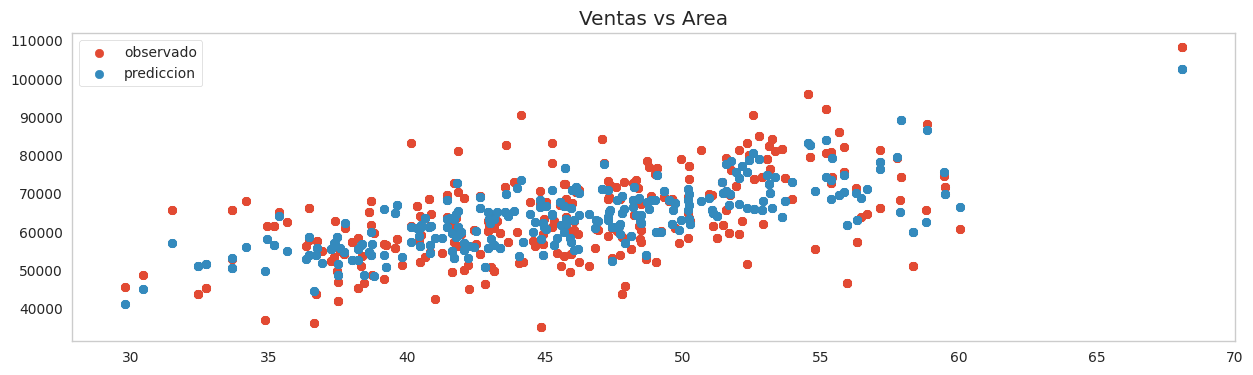

In [ ]:
plt.figure(figsize=(15,4))
plt.scatter(x['area'],y,label='observado');
plt.scatter(x['area'],res.predict(x),label='prediccion');
plt.title('Ventas vs Area')
plt.legend()
plt.grid()

### **Métricas**

### Analisis de los residuales
Después de todo modelo, es bueno verificar la distribucion de los residuales:

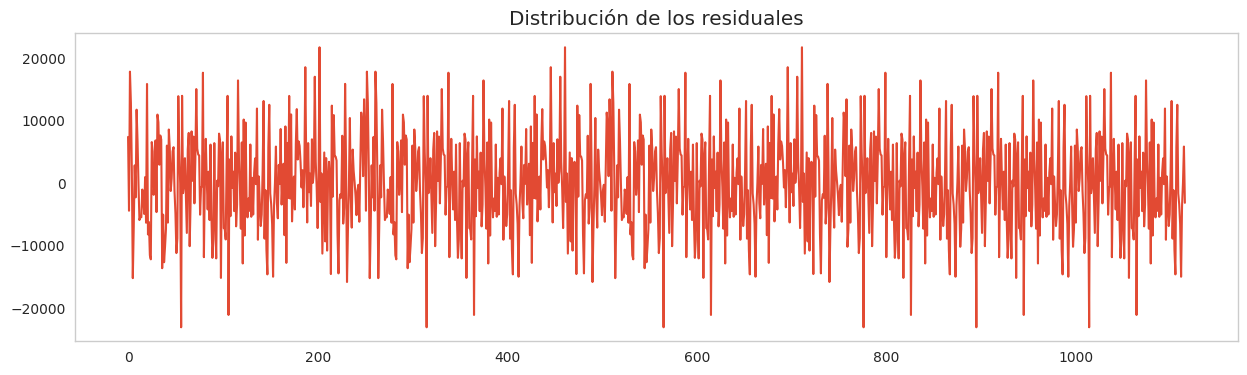

In [ ]:
plt.figure(figsize=(15,4))
res.resid.plot();
plt.title('Distribución de los residuales')
plt.grid()

Los residuales oscilan a una linea recta (imaginaria) con lo q se valida que se distribuyen de forma aleatoria

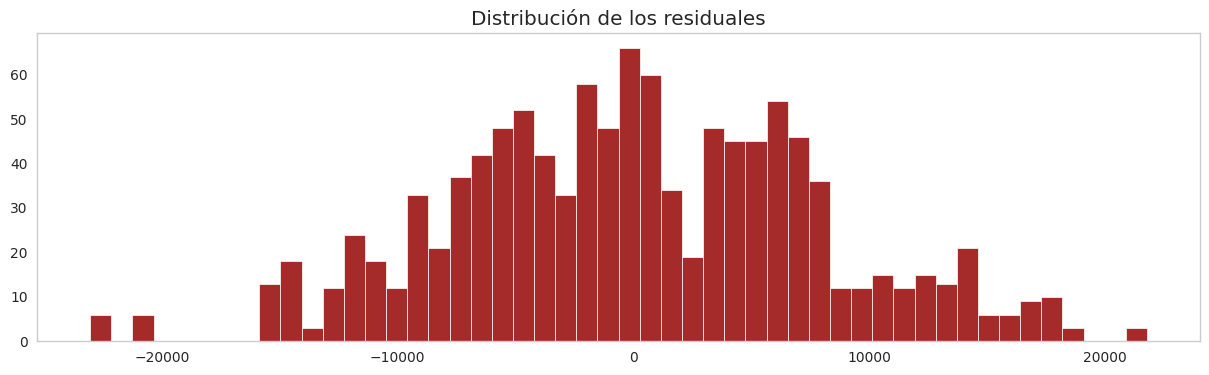

In [ ]:
plt.figure(figsize=(15,4))
plt.hist(res.resid,bins=50,color='brown');
plt.title('Distribución de los residuales')
plt.grid()

Notamos que los residuales se distribuyen en forma normal

In [ ]:
import pylab

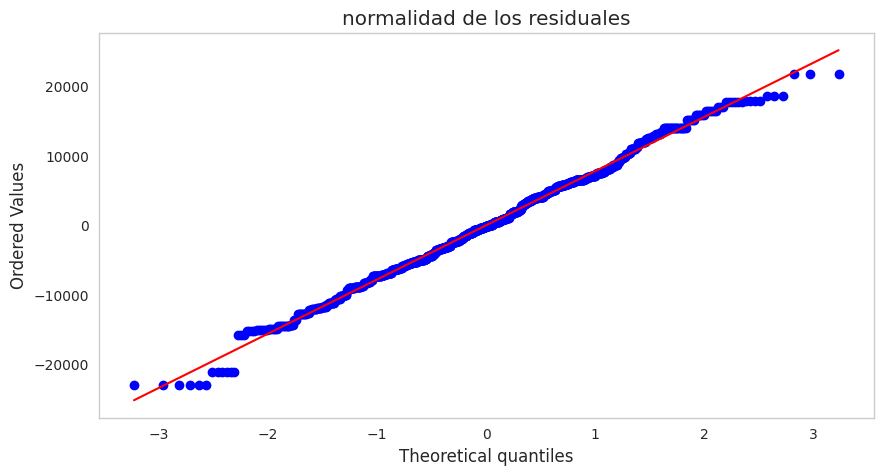

In [ ]:
# Grafico de cuartiles
plt.figure(figsize=(10,5))
stats.probplot(res.resid, dist="norm", plot=pylab);
plt.title('normalidad de los residuales')
plt.grid()